In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv("insurance.csv")

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
#displaying tail

In [17]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [19]:
#displaying data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
#check for dublication
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [22]:
#finding missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
#calculating the % of missing values
(data.isnull().sum()/(len(data)))*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [25]:
# Remove age column from data
data = data.drop(['age'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   object 
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


AttributeError: 'AxesSubplot' object has no attribute 'unique'

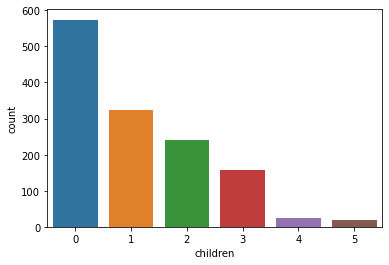

In [27]:
#Plot the unique values

sns.countplot(df['children']).unique()


ValueError: boxplot method requires numerical columns, nothing to plot.

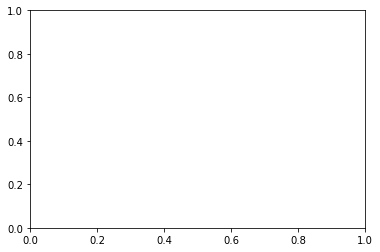

In [28]:
#Boxplot

df[['smoker']].boxplot()


<AxesSubplot:>

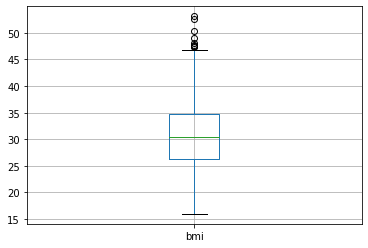

In [29]:
#Boxplot

df[['bmi']].boxplot()


In [30]:
#Correlation 

df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

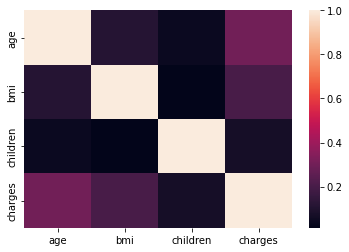

In [31]:
#Correlation plot

sns.heatmap(df.corr())


In [32]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

NameError: name 'num_cols' is not defined

<Figure size 936x1224 with 0 Axes>

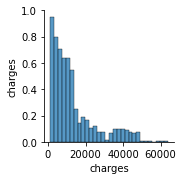

In [35]:
# EDA Bivariate Analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['children','bmi'],axis=1))
plt.show()

<Figure size 936x1224 with 0 Axes>

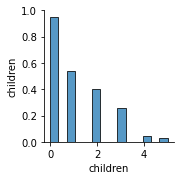

In [36]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['charges','bmi'],axis=1))
plt.show()

<Figure size 936x1224 with 0 Axes>

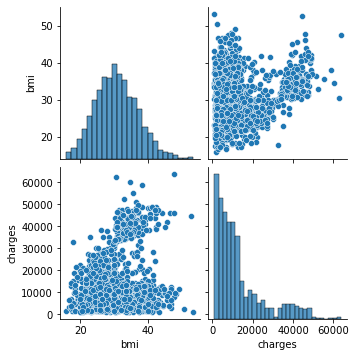

In [37]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['children'],axis=1))
plt.show()

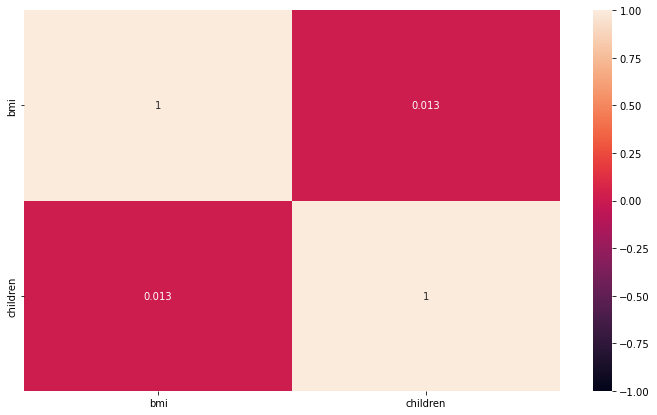

In [42]:
#EDA Multivariate Analysis
#A heat map is widely been used for Multivariate Analysis
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['charges'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

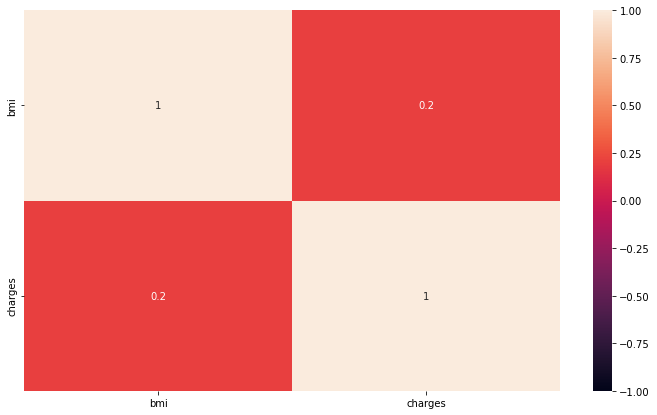

In [43]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['children'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

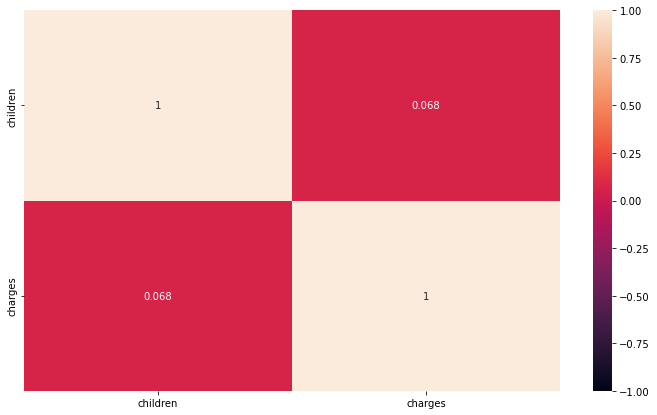

In [44]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['bmi'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()